# COGS 118A- Project Checkpoint

# Names

- Dylan Nelson (DN)
- Mengyu Zhang (MY)
- Shengjie Mao (SJ)
- Yufei Deng (YD)

# Abstract 

This project is intended to design a machine learning algorithm that takes images of dogs and outputs their breed names accordingly. The dataset we will be using is adapted from the Stanford Dogs Dataset, which has a total of 20,580 individual dog images of 120 different breed categories. We plan on using Convolutional Neural Networks (CNN) for the image classification task. Before feeding input images into the neural nets, we will explore image transformation methods (e.g., image cropping/ resizing, converting to greyscale) to ensure the maximal performance of the CNN with the least amount of information required. The performance of models will be measured using the two metrics for classification: Accuracy and Area Under Curve (AUC). Lastly, we will apply data visualization tools such as TSNE to the classification results, which helps visualize the separability of the clusters of dog breeds.

# Background
Hunting continues to make many animal species extinct, and the governments are unable to do much except introducing some laws and conducting regular surveys. But conducting a survey is not an easy task, especially without the help of technology<a name="sinha"></a>[<sup>[1]</sup>](#sinhanote).

Camera trap could help us with this, camera Trap is a camera that is automatically triggered bya change in some activity in its vicinity , like presence of an animal<a name="wiki"></a>[<sup>[2]</sup>](#wikinote).

In order for the camera trap to match the image with the animal in the wild, we would have to train the models with the animals pictures. We could start with the animal that we are most familiar with: dogs. With the results we get from analyzing the data of dogs, we might be able to find the most efficient way to categorize the images of other animals. Camera trap imaging (automatic photography of animal species in the wild) is becoming the gold standard in biodiversity conservation efforts. It allows for accurately monitoring large swaths of land at an unprecedented scale<a name="rogala"></a>[<sup>[3]</sup>](#rogalanote).

Instead of sending people to the wild and do massive work, we can just train our model with existing pictures of the animals we want to capture and put cameras out there, we will be able to know the time, location and what kind of animals passed through. Also, this method could also help us in other way, “Cameras Designed To Find Rare Animals Could Catch Poachers Instead”<a name="atherton"></a>[<sup>[4]</sup>](#athertonnote).

<!-- Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts.  -->


# Problem Statement

We want to create a model that can detect different breeds of dogs from images. This could be readily applied in many ways: field research, live cameras, search engine classification, etc. From our background research, we saw not many models had promising results. We’d like to explore this ourselves, look at the problems we face along the way, and either improve them, or at strengthen our understanding of the limitations of ML methods.

# Data

## Basic descriptions


__Datasets__: Stanford Dogs Dataset: http://vision.stanford.edu/aditya86/ImageNetDogs/

- The dataset contains `20,580` images of `120` dog breeds, as well as annotations for each image if we chose to use those. With 20k pictures we believe we can use the pixel data from each image to develop features to do a classification problem

**Dataset Stats**  
Total Pics: 20,580  
Total Species: 120

Average # pics: 	 171.5  
Minimum # pics: 	 148  
Maximum # pics: 	 252  

**Image Stats**  
Mean img Height: 	 385.861  
Mean img Width: 	 442.532  

Med img Height: 	 375.0  
Med img Width: 		 500.0  

![output.png](output.png)
*There are no low outliers (too little info), only breeds with a relatively large amount of pics*
![output2.png](output2.png)
*even the lowest 50 breeds have a range of 8 images, little to no underrepresentation*

## Loading & Preprocessing image data

In [36]:
# basics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

from pathlib import Path
import os

In [4]:
directory = str(Path.cwd())+'/Images'
all_img_dir = [i for i in os.listdir(directory) if 'n0' in i]

Name = []
for file in all_img_dir: 
    name = file.split('-')[-1]
    Name += [name]
Name, len(Name)

(['silky_terrier',
  'Scottish_deerhound',
  'Chesapeake_Bay_retriever',
  'Ibizan_hound',
  'haired_fox_terrier',
  'Saluki',
  'cocker_spaniel',
  'schipperke',
  'borzoi',
  'Pembroke',
  'komondor',
  'Staffordshire_bullterrier',
  'standard_poodle',
  'Eskimo_dog',
  'English_foxhound',
  'golden_retriever',
  'Sealyham_terrier',
  'Japanese_spaniel',
  'miniature_schnauzer',
  'malamute',
  'malinois',
  'Pekinese',
  'giant_schnauzer',
  'Mexican_hairless',
  'Doberman',
  'standard_schnauzer',
  'dhole',
  'German_shepherd',
  'Bouvier_des_Flandres',
  'Siberian_husky',
  'Norwich_terrier',
  'Irish_terrier',
  'Norfolk_terrier',
  'Saint_Bernard',
  'Border_terrier',
  'briard',
  'Tibetan_mastiff',
  'bull_mastiff',
  'Maltese_dog',
  'Kerry_blue_terrier',
  'kuvasz',
  'Greater_Swiss_Mountain_dog',
  'Lakeland_terrier',
  'Blenheim_spaniel',
  'basset',
  'West_Highland_white_terrier',
  'Chihuahua',
  'Border_collie',
  'redbone',
  'Irish_wolfhound',
  'bluetick',
  'minia

In [40]:
def load_image(n_classes=len(Name), color_mode='rgb', target_size=(128, 128)):
    train_data = [] #np.array([])
    test_data = [] #np.array([])
    train_label = [] #np.array([]) 
    test_label = [] #np.array([])

    for i in range(n_classes):
        path = os.path.join(directory+'/', all_img_dir[i])

        t = 0
        for im in os.listdir(path):
            n = len(os.listdir(path))
            image = load_img(os.path.join(path+'/', im), 
                             color_mode=color_mode, #grayscale=False,  
                             target_size=target_size)
            image = img_to_array(image)
            image = image/255.0
            
            if t <= np.floor(n*0.8):
                train_data.append(image)
                train_label.append(Name[i])          
            else:
                test_data.append(image)
                test_label.append(Name[i])
        
            t+=1
    
    return train_data, test_data, train_label, test_label


In [41]:
# import images of first 15 categories in grayscale and size 128 x 128
train_data, test_data, train_label, test_label = load_image(n_classes=15,
                                                            color_mode='grayscale',
                                                            target_size=(128,128))

In [42]:
# convert image data into numpy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)

# flatten each image into 1-D array of pixel values
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1]**2))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1]**2))

# get image labels
train_label = np.array(train_label)
test_label = np.array(test_label)

# Let's print out the new shape
print('train shape is now: ' + str(train_data.shape))
print('test  shape is now: ' + str(test_data.shape))

train shape is now: (2047, 16384)
test  shape is now: (500, 16384)


In [43]:
# combine data and labels into pandas dataframe
train_df = pd.DataFrame(train_data)
train_df['label'] = train_label

test_df = pd.DataFrame(test_data)
test_df['label'] = test_label

In [44]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.850980,0.858824,0.870588,0.862745,0.866667,0.850980,0.847059,0.823529,0.811765,0.800000,...,0.847059,0.831373,0.827451,0.807843,0.819608,0.831373,0.811765,0.819608,0.819608,silky_terrier
1,0.921569,0.921569,0.921569,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,0.925490,...,0.313726,0.509804,0.509804,0.509804,0.556863,0.203922,0.396078,0.435294,0.560784,silky_terrier
2,0.580392,0.411765,0.509804,0.384314,0.584314,0.643137,0.709804,0.470588,0.745098,0.698039,...,0.603922,0.607843,0.898039,0.635294,0.690196,0.705882,0.749020,0.541176,0.858824,silky_terrier
3,0.509804,0.509804,0.501961,0.494118,0.490196,0.482353,0.482353,0.482353,0.470588,0.474510,...,0.188235,0.192157,0.168627,0.149020,0.121569,0.109804,0.086275,0.062745,0.054902,silky_terrier
4,0.352941,0.368627,0.364706,0.372549,0.376471,0.384314,0.380392,0.388235,0.400000,0.400000,...,0.529412,0.521569,0.505882,0.498039,0.482353,0.470588,0.462745,0.458824,0.450980,silky_terrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,0.545098,0.529412,0.568627,0.568627,0.498039,0.466667,0.309804,0.215686,0.203922,0.188235,...,0.517647,0.517647,0.517647,0.552941,0.572549,0.592157,0.592157,0.596078,0.596078,English_foxhound
2043,0.164706,0.101961,0.168627,0.184314,0.211765,0.192157,0.188235,0.184314,0.239216,0.235294,...,0.419608,0.419608,0.419608,0.419608,0.407843,0.407843,0.400000,0.388235,0.388235,English_foxhound
2044,0.098039,0.090196,0.133333,0.576471,0.192157,0.066667,0.250980,0.082353,0.066667,0.470588,...,0.133333,0.545098,0.113725,0.160784,0.552941,0.043137,0.101961,0.203922,0.196078,English_foxhound
2045,0.372549,0.403922,0.388235,0.435294,0.698039,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.384314,0.560784,0.400000,0.545098,0.513726,0.454902,0.498039,0.392157,0.419608,English_foxhound


In [45]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.690196,0.819608,0.807843,0.827451,0.815686,0.839216,0.843137,0.839216,0.819608,0.819608,...,0.588235,0.568627,0.654902,0.588235,0.556863,0.580392,0.890196,0.815686,0.666667,silky_terrier
1,0.388235,0.411765,0.486275,0.541176,0.466667,0.454902,0.509804,0.423529,0.478431,0.388235,...,0.588235,0.627451,0.694118,0.549020,0.690196,0.556863,0.635294,0.576471,0.509804,silky_terrier
2,0.203922,0.211765,0.215686,0.192157,0.219608,0.215686,0.200000,0.203922,0.188235,0.176471,...,0.552941,0.568627,0.533333,0.533333,0.549020,0.549020,0.533333,0.509804,0.541176,silky_terrier
3,0.274510,0.301961,0.333333,0.345098,0.345098,0.352941,0.352941,0.349020,0.356863,0.372549,...,0.188235,0.200000,0.168627,0.160784,0.149020,0.152941,0.050980,0.050980,0.062745,silky_terrier
4,0.050980,0.050980,0.050980,0.054902,0.054902,0.058824,0.054902,0.054902,0.050980,0.050980,...,0.725490,0.717647,0.733333,0.701961,0.729412,0.717647,0.741176,0.717647,0.717647,silky_terrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.298039,0.262745,0.227451,0.254902,0.203922,0.305882,0.235294,0.321569,0.368627,0.258824,...,0.360784,0.403922,0.376471,0.301961,0.313726,0.286275,0.282353,0.286275,0.290196,English_foxhound
496,0.247059,0.250980,0.247059,0.239216,0.227451,0.215686,0.290196,0.411765,0.462745,0.521569,...,0.603922,0.631373,0.749020,0.709804,0.537255,0.603922,0.423529,0.517647,0.466667,English_foxhound
497,0.003922,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,English_foxhound
498,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,...,0.584314,0.662745,0.545098,0.627451,0.639216,0.584314,0.521569,0.690196,0.725490,English_foxhound


# Proposed Solution

We plan to use a deep learning and neural network approach to solve the image classification task. We will implement the Conolutional Neural Network method from python libraries such as Tensorflow, keras, etc. We will also be testing out dimensionality reduction algorithms such as PCA as part of the pre-processing steps. The PCA will allow us to single out the most important features of our images before feeding them into the neural networks, which could help boost model performance.

For training, testing, and model selection, we will be importing relevent packages from the Scikit Learn library. We plan on doing a 80/20 training-and-testing-set split, then applying k-fold-cross-validation to select the model with the best training accuracy.

We also found another group who used Sci Kit learn to almost entirely do a similar problem. They divided their data, selected a model, and processed their data using this package. In their methods they only used ~5 different categories. Our problem requires many more classes but we can see how well this solution scales. Their processing basically took images and converted it into a grid of vectors that helped the model detect shapes and features better. Following that they used stochastic gradient descent as their model choice and had promising results we’d like to test out ourselves.

Ultimately, we found a large variety of possible methods we could take and would like to try a few. If they don’t work and given we still have time, we could also look for even more methods elsewhere. Or possibly even combine methods in something like a decision tree learning style.

# Evaluation Metrics

__Different Approaches at Accuracy:__

comparing different sample distributions: It is important we chose a sample to test our data on that is fair. Two ways we can do that is equal representation of each class, or representation of each class that represents their real world distributions. Since we aren’t providing this as a service for a specific audience, these are the most generalizable options. Since the real world distribution changes and we don’t have a preference towards one breed vs others, it may be most fair to have each breed be equally represented, assuming the data is strong enough to support that
Calculations: Since there is no discrete data, and the outputs are purely categorical, calculating distances or most other math-based metrics are not necessary. Some of the following metrics will be tracked and accounted for across models:
(Precision, Recall, Accuracy, F1socre)

ROC-AUC Since our data has more than 2 classes, we will use a “One vs. Rest” scheme for drawing the ROC curve and calculating the AUC score, specifically by reducing all classes other than the target class to one “negative” class.

# Preliminary results

-- We used the SVM as our model 
NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



## Baseline: SVM

In [54]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
import tensorflow as tf

# evaluation
from sklearn.model_selection import (KFold, GridSearchCV)
from sklearn.metrics import (accuracy_score, f1_score, auc, roc_curve)

In [47]:
X_train = train_df.iloc[:,:-1].values
y_train = train_df['label'].values

X_test = test_df.iloc[:,:-1].values
y_test = test_df['label'].values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2047, 16384), (2047,), (500, 16384), (500,))

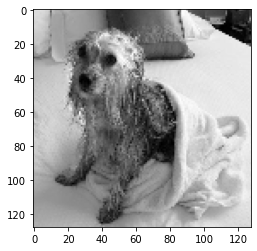

In [48]:
img = X_train[0].reshape((128,128))
plt.imshow(img, cmap='gray')

In [52]:
model = SVC()
param_grid = {'kernel':('linear', 'rbf'),
             'C': [1.0, 10]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(estimator=model, 
                   param_grid=param_grid, 
                   cv=kf,
                   verbose=3, n_jobs=-1)
clf.fit(X_train, y_train)

# View the Grid Search CV Results
pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed: 11.4min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.7min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,233.116439,0.844839,42.676969,2.357258,1,linear,"{'C': 1.0, 'kernel': 'linear'}",0.148780,0.146341,0.146699,0.146699,0.146699,0.147044,0.000879,3
1,276.511479,58.423269,42.591630,5.939574,1,rbf,"{'C': 1.0, 'kernel': 'rbf'}",0.192683,0.175610,0.195599,0.161369,0.200489,0.185150,0.014545,2
2,360.508172,2.231249,46.465656,0.287504,10,linear,"{'C': 10, 'kernel': 'linear'}",0.148780,0.146341,0.146699,0.146699,0.146699,0.147044,0.000879,3
3,220.534110,74.151966,24.907798,9.490255,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.197561,0.185366,0.163814,0.183374,0.202934,0.186610,0.013550,1


In [55]:
svm = SVC(kernel='rbf', C=10).fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)

print("Classifier: SVM; Test accuracy: %f" % svm_acc)

Classifier: SVM; Test accuracy: 0.202000


# Ethics & Privacy

- __Data collection__: We retrieved the dataset from Stanford dataset, which means that we did not have direct access to the participants. Since the library is a public platform, we believe that we are allowed to use the data for our analysis and will not hold bias toward the contents of the data;
- __Data storage__: We can assume that the data is safe and will not be exposed to others for illegal use since we only process and analyze the data using Google drive and Github associated with our UCSD email addresses. We will also delete the data from our local computer once we finish the project;
- __Analysis__: We will use visualizations along with the codes and descriptions in our analysis so that people can understand our analysis clearly. We will make well documented analysis to make it reproducible later;
- __Modeling__: We will not rely on discriminated data. And since we evaluate the dog datasets, we will not have ethical concerns about race, genders, etc;
- __Deployment__: We will not allow unintended use of the model by tracking the activities on our Github homepage. We believe that the model can help us have better understanding toward the breeds of the dog.

# Team Expectations 


- _Team Expectation 1_: Group members will try to attend almost every meetings and will be able to share their opinions after the meetings if they miss one of the meetings;
- _Team Expectation 2_: Group members will respect each others’ perspectives and will discuss the conflicts friendly;
- _Team Expectation 3:_ Group members will all follow the project timeline and finish the assigned work on time;
- _Team Expectation 4:_ Group members will try to have all works be evenly distributed and everyone will contribute eagerly.

# Project Timeline Proposal

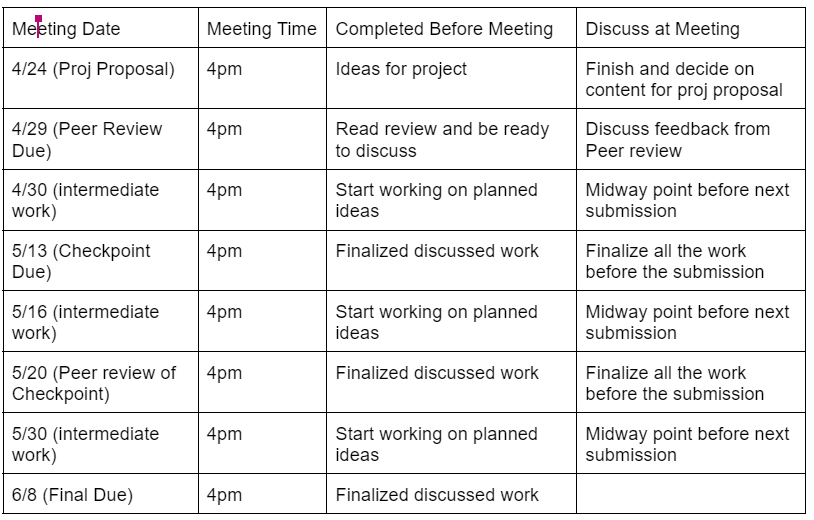

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/24 (Proj Proposal)  |  4 PM |  Brainstorm project topics  | Finish and decide on content for project | 
| 4/30 (Peer Review Due)  |  4 AM |  Browse proposals of assigned groups and be ready to discuss  | Review and discuss proposals from other groups| 
| 5/2 (Intermediate Work)  | 4 PM  | Start working on planned ideas (all members)  | Discuss data cleaning and possible algorithms; Assign group members to lead each specific part   |
| 5/20 (Checkpoint Due)  | 3 PM  | Import & preprocess Data (YD), EDA (DN), Baseline model (SJ  &  MY) | Discuss data cleaning and algorithms to implement; Assign work to group members  |
| 5/25 (Intermediate Work)  | 3 PM  | Begin working on planned ideas | Review/edit code; Complete project |
| 6/1 (Conti.)  | 3 PM  | Review results/conclusion/discussion | Finalize full project |
| 6/8 (Final Due)  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes

<a name="sinhanote"></a>1.[^](#sinha): Sinha, A. K. (Sep 17, 2021) Animal Classification With RPi Camera For Survey And Monitoring. *Electronicsforu*. https://www.electronicsforu.com/electronics-projects/animal-classification-rpi-camera-survey-monitoring<br>

<a name="wikinote"></a>2.[^](#wiki): Camera trap. *Wikipedia*. https://en.wikipedia.org/wiki/Camera_trap<br>

<a name="rogalanote"></a>3.[^](#rogala): Rogala, M. & Świeżewski, J. (Feb, 2020) Using AI to Identify Wildlife in Camera Trap Images from the Serengeti. *KD Nuggets*. https://www.kdnuggets.com/2020/02/using-ai-identify-wildlife-images-serengeti.html<br>

<a name="athertonnote"></a>4.[^](#atherton): Atherton, K. D. (Sep 17, 2013) PMCameras Designed To Find Rare Animals Could Catch Poachers Instead. *Popular Science*. https://www.popsci.com/technology/article/2013-09/satellite-linked-cameras-fight-poaching-kenya/